In [1]:
# imports: 
import torch
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(0);

# Tensors in pytorch:

In [2]:
# Create a tensor x from a list: [[1.,2.],[3.,4.]]
x = torch.tensor([[1.,2.],[3.,4.]])
#----------------------------------------------
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [3]:
# Create a tensor x from numpy array: np.array([[1.,2.],[3.,4.]])
arr = np.array([[1.,2.],[3.,4.]])
x = torch.tensor(arr)
#----------------------------------------------
print(x)

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [4]:
# Create an all-zeros 3x3 tensor
x = torch.zeros(3,3)
#----------------------------------------------
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [5]:
# Create a random 3x3 tensor with entries in [0,1]
x = torch.rand(3,3)
#----------------------------------------------
print(x)

tensor([[0.4963, 0.7682, 0.0885],
        [0.1320, 0.3074, 0.6341],
        [0.4901, 0.8964, 0.4556]])


In [6]:
# Access all rows and first two columns of x:
y = x[:,0:2]
#----------------------------------------------
print(y)

tensor([[0.4963, 0.7682],
        [0.1320, 0.3074],
        [0.4901, 0.8964]])


In [7]:
# Access all rows and first and third columns of x:
y = x[:,[0,2]]
#----------------------------------------------
print(y)

tensor([[0.4963, 0.0885],
        [0.1320, 0.6341],
        [0.4901, 0.4556]])


In [8]:
# Convert x to numpy
arr = x.numpy()
#----------------------------------------------
print(arr)
print(type(arr))

[[0.4962566  0.7682218  0.08847743]
 [0.13203049 0.30742282 0.6340787 ]
 [0.4900934  0.89644474 0.45562798]]
<class 'numpy.ndarray'>


### Operating on tensors:

In [9]:
x = torch.tensor([[1.,2.],[3.,4.]])
y = 0.1*x
print('x: ', x)
print('y: ', y)

x:  tensor([[1., 2.],
        [3., 4.]])
y:  tensor([[0.1000, 0.2000],
        [0.3000, 0.4000]])


#### Most default operations are element-wise unless specified otherwise

In [10]:
# add x & y
x+y

tensor([[1.1000, 2.2000],
        [3.3000, 4.4000]])

In [11]:
# Element-wise multiply x and y:
# NOT matrix multiplication
x*y

tensor([[0.1000, 0.4000],
        [0.9000, 1.6000]])

In [12]:
# Element-wise divide x and y:
x/y

tensor([[10., 10.],
        [10., 10.]])

#### Matrix multiplications:
Note: Dimensions should follow the rules of linear algebra

In [13]:
# Shorthand for matrix multiplications:
x = torch.rand(10,3)
y = torch.rand(3,5)
#----------------------------------------------
z = x @ y


#----------------------------------------------
print(z)
print(z.shape)

tensor([[0.7114, 0.7466, 0.8391, 0.9269, 0.3460],
        [0.1816, 0.2936, 0.4362, 0.3522, 0.2145],
        [0.8673, 1.0977, 1.4929, 1.4152, 0.6654],
        [0.4872, 0.7119, 0.9490, 0.7941, 0.4707],
        [1.1558, 1.2945, 1.4184, 1.4605, 0.6370],
        [0.8472, 1.1357, 1.5030, 1.3492, 0.7085],
        [0.2325, 0.3700, 0.5322, 0.4289, 0.2647],
        [0.4406, 0.5305, 1.0098, 1.0404, 0.3693],
        [0.2365, 0.2045, 0.2202, 0.2994, 0.0689],
        [0.6320, 0.9276, 1.5299, 1.3642, 0.6760]])
torch.Size([10, 5])


### Assignment and clone with tensors:

In [14]:
# Create a tensor x with entries [1,2,3,4]
x = torch.tensor([1,2,3,4])

# Assign x to z
z = x

# modify z[0] to 5
z[0] = 5

#----------------------------------------------
print('z: ', z)
print('x: ',x)

z:  tensor([5, 2, 3, 4])
x:  tensor([5, 2, 3, 4])


In [15]:
# Create a tensor x with entries [1,2,3,4]
x = torch.tensor([1,2,3,4])

# Clone x to z
z = x.clone()

# modify z[0] to 5
z[0] = 5
#----------------------------------------------
print('z: ', z)
print('x: ',x)

z:  tensor([5, 2, 3, 4])
x:  tensor([1, 2, 3, 4])


***Takeaway: Assignment with "=" only create an alias. If modified, the original also gets modified, and vice-versa.***

***Takeaway: Use "clone()" to create a copy of a tensor without modification (not "=")***

In [16]:
# Create a tensor x with entries [1,2,3,4]
x = torch.tensor([1,2,3,4])

# Add 1 to x and assign to z
z = x+1

#----------------------------------------------
print('z: ', z)
print('x: ',x)

z:  tensor([2, 3, 4, 5])
x:  tensor([1, 2, 3, 4])


***Takeaway: "=" can be used freely if some modifications are performed; no need to use clone always***

# Questions?

-----
# Computational graph

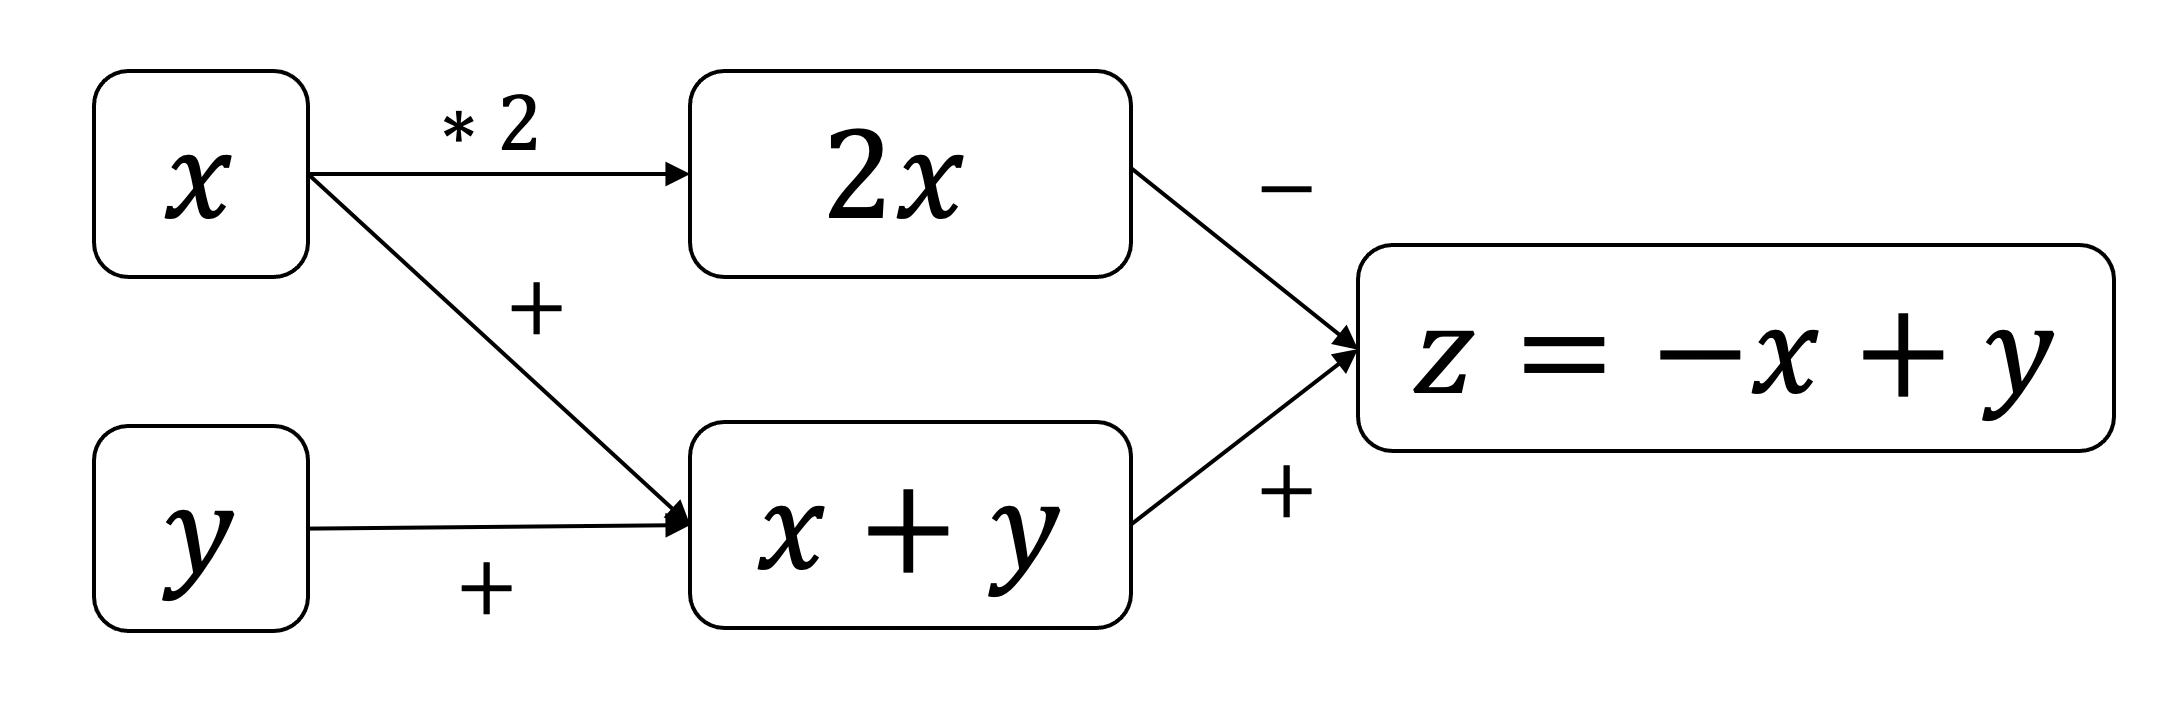

-----
# Automatic differentiation
- Track the computational graph and use chain rule to differentiate analytically

In [17]:
# Tensors WITHOUT gradient tracking 
x = torch.tensor([5.])
y = torch.tensor([7.])
#----------------------------------------------
print('x: ',x)
print('y: ',y)

x:  tensor([5.])
y:  tensor([7.])


In [18]:
# Tensors WITH gradient tracking 
x = torch.tensor([5.], requires_grad = True)
y = torch.tensor([7.])
y.requires_grad = True

#----------------------------------------------
print('x: ',x)
print('y: ',y)
print('Notice the "requires_grad" that has appeared in the tensors')

x:  tensor([5.], requires_grad=True)
y:  tensor([7.], requires_grad=True)
Notice the "requires_grad" that has appeared in the tensors


In [19]:
# Create intermediate variables
var1 = 2*x
var2 = x+y
#----------------------------------------------
print('var1: ',var1)
print('var2: ',var2)
print('\nNotice the "grad_fn" that has appeared in the tensors and tells which function was used to achieve this variable')

var1:  tensor([10.], grad_fn=<MulBackward0>)
var2:  tensor([12.], grad_fn=<AddBackward0>)

Notice the "grad_fn" that has appeared in the tensors and tells which function was used to achieve this variable


In [20]:
# Create final variable: z
z = var2 - var1
#----------------------------------------------
print(z)

tensor([2.], grad_fn=<SubBackward0>)


In [21]:
# Auto-differentiate: goes backward in the computational graph and computes all the gradients
z.backward()

In [22]:
# Get the gradients. Note that the gradients of z are stored in ".grad" of respective variables 
dz_dx = x.grad
dz_dy = y.grad
#----------------------------------------------
print('dz_dx: ', dz_dx)
print('dz_dy: ', dz_dy)

dz_dx:  tensor([-1.])
dz_dy:  tensor([1.])


#### Note 1: .backward() can be only called once. After calling .backward(), the computational graph is destroyed
#### Note 2: .backward() can be only called on a scalar, i.e., "z" has to be a scalar. However, "x", and "y", etc. can be vectors
#### Note 3: requires_grad needed for initial variables only (not the intermediate ones)

---
#### *A more complex example of automatic differentiation via .backward()* :

In [23]:
# Create scalar c using random tensors a and b. Remember to set requires_grad = True to enable gradient tracking
a = torch.rand(10,3, requires_grad = True)
b = torch.rand(3,5)
b.requires_grad = True

c = torch.norm(torch.sin(a) @ torch.pow(b,2))
#----------------------------------------------
print('c:',c)

c: tensor(3.4619, grad_fn=<CopyBackwards>)


In [24]:
# Use .backward() to compute gradients of c relative to a and b
c.backward()
#----------------------------------------------
print('dc/da:',a.grad)
print('dc/db:',b.grad)

dc/da: tensor([[0.0938, 0.2709, 0.1142],
        [0.0437, 0.1137, 0.0606],
        [0.1322, 0.2826, 0.1623],
        [0.1479, 0.3010, 0.1827],
        [0.1457, 0.3371, 0.1483],
        [0.0716, 0.2103, 0.0886],
        [0.1672, 0.3222, 0.1597],
        [0.1047, 0.2766, 0.1390],
        [0.0767, 0.1448, 0.0575],
        [0.1195, 0.2560, 0.1673]])
dc/db: tensor([[0.5632, 0.5398, 0.8796, 0.5221, 1.4163],
        [0.1423, 0.7645, 1.3658, 1.4778, 1.1370],
        [0.0023, 0.1227, 1.0282, 0.7308, 0.1148]])


----
***Detaching from a computational graph***

In [32]:
print(c)

tensor(3.4619, grad_fn=<CopyBackwards>)


In [33]:
# Detach c from the graph and print:
print(c.detach())

tensor(3.4619)


-----
#### Note: Once the tensor is detached / converted to numpy and back to torch / removed from pytorch, computational graph is broken and you can not do automatic differentiation anymore.

In [ ]:
a = torch.tensor([1.,2.,3.],requires_grad=True)
b = a**2
print(b)

In [ ]:
# Detach -> numpy -> back to torch tensor
b = torch.tensor(b.detach().numpy())
print(b)

In [ ]:
# Try calling backward()
b.backward()

## Questions?